# Assignment 3.1 — Data Summary & Exploratory Data Analysis (Draft)

**Dataset:** Kaggle — ULB Machine Learning Group, *Credit Card Fraud Detection* (`creditcard.csv`)  
**Goal:** Produce the *Data Summary & EDA* section plus supporting code/figures.

This notebook is structured to satisfy the assignment prompts:
1. **Variables & Datatypes** — What variables exist and their types?
2. **Data Issues & Handling** — Missing data, duplicates, imbalance, skew/outliers; why might these issues exist?
3. **Relevance to Project Goal** — Which variables/transformations/engineered features appear useful?
4. **Relationships Among Variables** — Correlations and modeling implications.
5. **Visualizations of Interest** — Only those that support your observations.

> **Note:** The modeling phase and full feature engineering are **not required** here; we only **identify** if transformations/features *may be needed later*.

## 0. Setup & Load

- Place `creditcard.csv` next to this notebook, or update `DATA_PATH` accordingly.
- We use **matplotlib only** (no seaborn), **one plot per figure**, and **no explicit colors** (per instruction).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display

# Path to the dataset
DATA_PATH = "archive/creditcard.csv"  # change if stored elsewhere

# Load the dataset
df = pd.read_csv(DATA_PATH)
n_rows, n_cols = df.shape
print(f"Loaded shape: {n_rows:,} rows x {n_cols} columns")
display(df.head())

Loaded shape: 284,807 rows x 31 columns


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 1. Variables & Datatypes

- `Time` — seconds elapsed between each transaction and the first transaction in the dataset (numeric).  
- `V1`–`V28` — **PCA-transformed** features, anonymized for confidentiality (numeric).  
- `Amount` — transaction amount (numeric).  
- `Class` — target label (binary: `0` = genuine, `1` = fraud).

Below: a schema table + summary statistics to describe distributions.

In [2]:
# Variables & dtypes
vars_dtypes = pd.DataFrame({'column': df.columns, 'dtype': df.dtypes.astype(str)})
display(vars_dtypes)

# Basic describe (numeric)
display(df.describe().T)

,column,dtype
Time,Time,float64
V1,V1,float64
V2,V2,float64
V3,V3,float64
V4,V4,float64
V5,V5,float64
V6,V6,float64
V7,V7,float64
V8,V8,float64
V9,V9,float64


,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


## 2. Data Issues & Handling

We check **missing values**, **duplicates**, **class imbalance**, and **skew/outliers** (for `Amount`).  
We also reason about the **likely source** of each issue:
- Class imbalance: fraud is **rare** in real-world data (business reality).  
- Feature anonymization: done to protect **privacy & confidentiality**.  
- Time window: dataset covers only **two days**, which can affect temporal distributions.

In [3]:
# Missing values
missing = df.isna().sum().reset_index()
missing.columns = ['column','missing_count']
display(missing)

# Duplicates
duplicate_count = int(df.duplicated().sum())
print("Duplicate rows:", duplicate_count)

# Class imbalance
class_counts = df['Class'].value_counts(dropna=False).sort_index()
fraud_rate = class_counts.get(1, 0)/class_counts.sum()
print("Class counts:\n", class_counts.to_string())
print(f"Fraud rate: {fraud_rate:.4%}")

# Skew / outliers for Amount
amount_skew = float(df['Amount'].skew())
Q1, Q3 = df['Amount'].quantile(0.25), df['Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound, upper_bound = Q1 - 1.5*IQR, Q3 + 1.5*IQR
amount_outliers = int(((df['Amount'] < lower_bound) | (df['Amount'] > upper_bound)).sum())
print(f"Amount skew: {amount_skew:.2f}")
print(f"Amount IQR bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")
print("Approx. Amount outlier count (IQR method):", amount_outliers)

,column,missing_count
0,Time,0
1,V1,0
2,V2,0
3,V3,0
4,V4,0
5,V5,0
6,V6,0
7,V7,0
8,V8,0
9,V9,0


Duplicate rows: 1081
Class counts:
 Class
0    284315
1       492
Fraud rate: 0.1727%
Amount skew: 16.98
Amount IQR bounds: [-101.75, 184.51]
Approx. Amount outlier count (IQR method): 31904


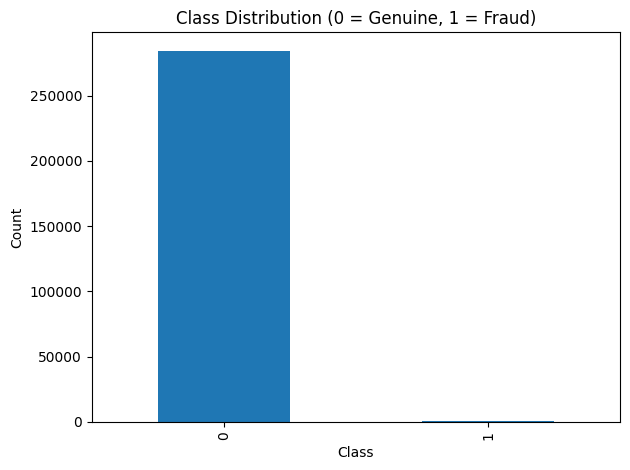

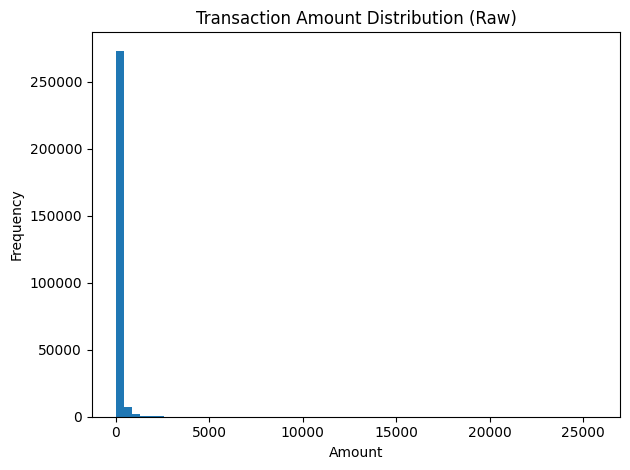

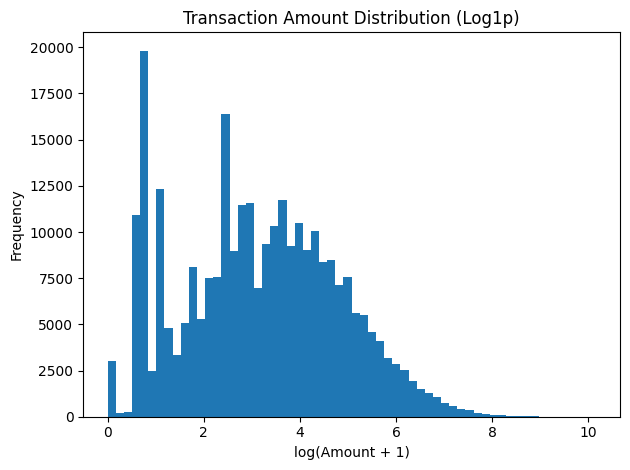

In [4]:
# Visualization: class distribution
plt.figure()
class_counts.plot(kind='bar')
plt.title('Class Distribution (0 = Genuine, 1 = Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Visualization: Amount distribution (raw)
plt.figure()
df['Amount'].plot(kind='hist', bins=60)
plt.title('Transaction Amount Distribution (Raw)')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Visualization: Amount distribution (log1p)
plt.figure()
np.log1p(df['Amount']).plot(kind='hist', bins=60)
plt.title('Transaction Amount Distribution (Log1p)')
plt.xlabel('log(Amount + 1)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## 3. Relevance to Project Goal + Potential Transformations / Engineering

**Project goal:** build a classifier that differentiates fraudulent from genuine transactions.  
We explore simple descriptive splits and **identify** (not fully implement) helpful transformations/features:
- `LogAmount = log(Amount + 1)` can reduce skew.
- `HourOfDay = floor(Time/3600) mod 24` can capture temporal patterns.

> We create these two engineered variables **for EDA only** so we can discuss their potential value in the report.

,Class,count,mean,median,std
0,0,284315,88.291022,22.00,250.105092
1,1,492,122.211321,9.25,256.683288


,HourOfDay,txn_count,fraud_rate
0,0,7695,0.000780
1,1,4220,0.002370
2,2,3328,0.017127
3,3,3492,0.004868
4,4,2209,0.010412
5,5,2990,0.003679
6,6,4101,0.002195
7,7,7243,0.003175
8,8,10276,0.000876
9,9,15838,0.001010


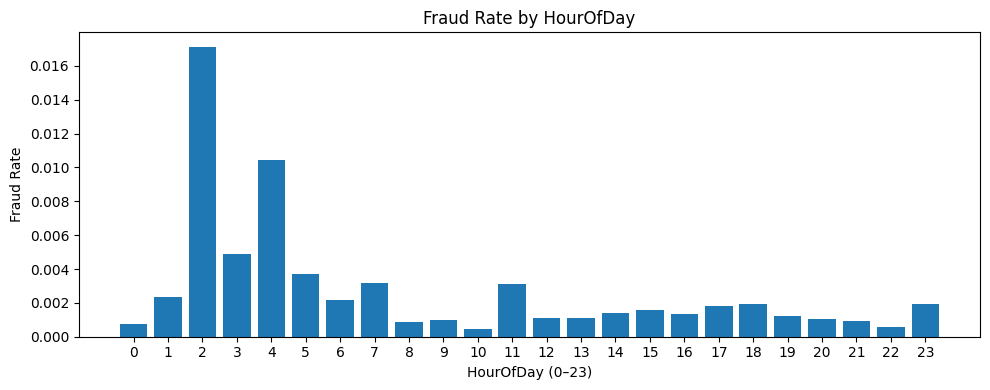

In [5]:
# Engineer two EDA-only features
df['HourOfDay'] = ((df['Time'] // 3600) % 24).astype(int)
df['LogAmount'] = np.log1p(df['Amount'])

# Amount by class comparison
amount_stats = df.groupby('Class')['Amount'].agg(['count','mean','median','std']).reset_index()
display(amount_stats)

# Fraud rate by hour of day
fraud_by_hour = df.groupby('HourOfDay')['Class'].agg(['count','mean']).reset_index()
fraud_by_hour.columns = ['HourOfDay','txn_count','fraud_rate']
display(fraud_by_hour.head(10))

# Plot: Fraud rate by hour
plt.figure(figsize=(10,4))
plt.bar(fraud_by_hour['HourOfDay'].astype(str), fraud_by_hour['fraud_rate'])
plt.title('Fraud Rate by HourOfDay')
plt.xlabel('HourOfDay (0–23)')
plt.ylabel('Fraud Rate')
plt.tight_layout()
plt.show()

## 4. Relationships Among Variables (Correlations) & Modeling Implications

We compute Pearson correlations to understand relationships:
- Rank features by absolute correlation with `Class` (signal indicator).
- Visualize a **top‑10** subset to inspect inter-feature correlation.
- **Modeling implications:** residual correlations (even post‑PCA) can affect linear models; consider **regularization (L1/L2)** or **tree‑based** models which are less sensitive to multicollinearity.

,abs_corr_with_Class
V17,0.326481
V14,0.302544
V12,0.260593
V10,0.216883
V16,0.196539
V3,0.192961
V7,0.187257
V11,0.154876
V4,0.133447
V18,0.111485


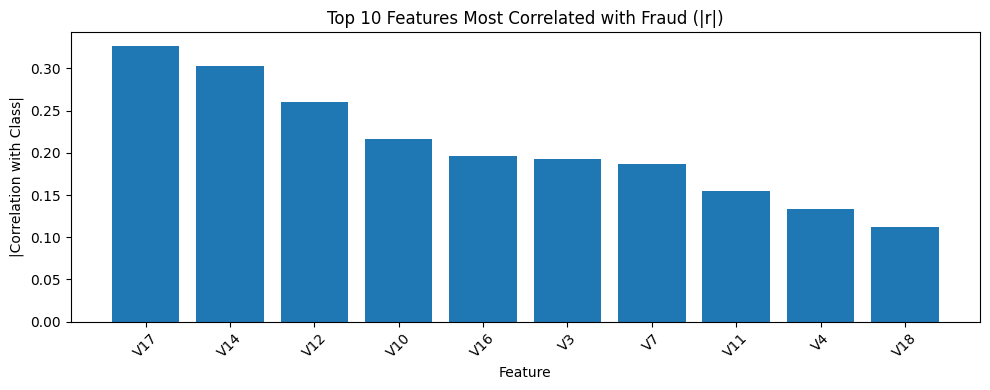

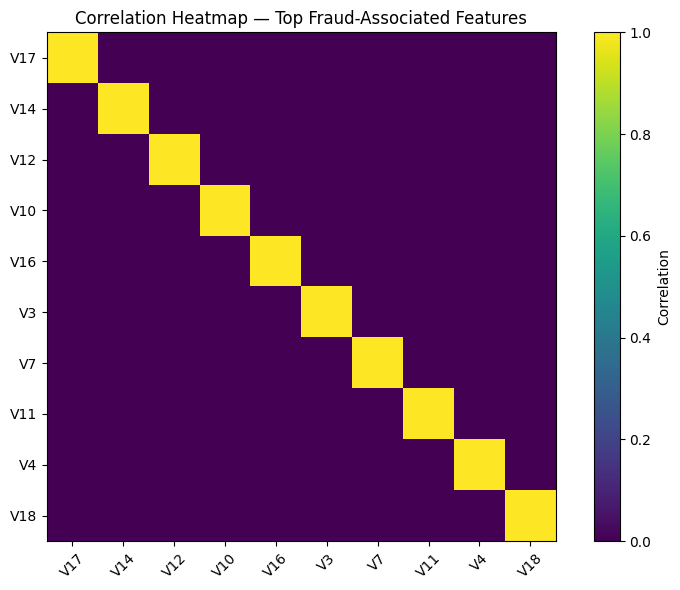

In [6]:
# Correlation matrix
corr = df.corr(numeric_only=True)

# Top-10 by |corr with Class|
corr_with_class = corr['Class'].drop(labels=['Class']).abs().sort_values(ascending=False)
top10 = corr_with_class.head(10)
display(top10.to_frame('abs_corr_with_Class'))

# Bar plot of top-10
plt.figure(figsize=(10,4))
plt.bar(top10.index, top10.values)
plt.title('Top 10 Features Most Correlated with Fraud (|r|)')
plt.xlabel('Feature')
plt.ylabel('|Correlation with Class|')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Heatmap for top-10 inter-feature correlations
top10_features = top10.index.tolist()
subset_corr = corr.loc[top10_features, top10_features]

plt.figure(figsize=(8,6))
plt.imshow(subset_corr, interpolation='nearest')
plt.colorbar(label='Correlation')
plt.xticks(range(len(top10_features)), top10_features, rotation=45)
plt.yticks(range(len(top10_features)), top10_features)
plt.title('Correlation Heatmap — Top Fraud-Associated Features')
plt.tight_layout()
plt.show()

## 6. Save Slim CSV with Engineered Features

This exports `Time, Amount, Class, HourOfDay, LogAmount` for reproducibility and quick experiments later.

## 7. Modeling & Experimental Setup

In this section we transition from exploratory data analysis to supervised modeling and anomaly detection. We reuse the in-memory `df` with engineered features and define train/validation/test splits, models, and evaluation helpers.

In [7]:

from sklearn.model_selection import train_test_split

# Features: use all numeric columns except the target 'Class'
target_col = 'Class'
feature_cols = [c for c in df.columns if c != target_col]

X = df[feature_cols].values
y = df[target_col].values

X_train_full, X_temp, y_train_full, y_temp = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42
)

print('Train shape:', X_train_full.shape, 'Val shape:', X_val.shape, 'Test shape:', X_test.shape)


Train shape: (199364, 32) Val shape: (42721, 32) Test shape: (42722, 32)


In [8]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_full)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

print('Scaling complete.')


Scaling complete.


In [9]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

def evaluate_classifier(name, model, X_tr, y_tr, X_va, y_va):
    """Fit the model and print core metrics on validation data."""
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_va)
    # Some models output probabilities, others decision functions
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_va)[:, 1]
    elif hasattr(model, "decision_function"):
        from sklearn.preprocessing import MinMaxScaler
        scores = model.decision_function(X_va)
        y_proba = MinMaxScaler().fit_transform(scores.reshape(-1, 1)).ravel()
    else:
        y_proba = y_pred

    acc = accuracy_score(y_va, y_pred)
    prec = precision_score(y_va, y_pred, zero_division=0)
    rec = recall_score(y_va, y_pred, zero_division=0)
    f1 = f1_score(y_va, y_pred, zero_division=0)
    try:
        auc = roc_auc_score(y_va, y_proba)
    except ValueError:
        auc = float('nan')

    print(f"\n=== {name} ===")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-score : {f1:.4f}")
    print(f"ROC-AUC  : {auc:.4f}")
    print("\nClassification report:\n", classification_report(y_va, y_pred, zero_division=0))


In [10]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# 1. Logistic Regression (with class_weight='balanced')
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', n_jobs=-1)
evaluate_classifier("Logistic Regression", log_reg, X_train, y_train_full, X_val, y_val)

# 2. Random Forest
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    n_jobs=-1,
    class_weight='balanced_subsample',
    random_state=42
)
evaluate_classifier("Random Forest", rf, X_train, y_train_full, X_val, y_val)

# 3. Linear SVM via LinearSVC
svm_lin = LinearSVC(class_weight='balanced', random_state=42)
evaluate_classifier("Linear SVM (LinearSVC)", svm_lin, X_train, y_train_full, X_val, y_val)

# 4. Naive Bayes
nb = GaussianNB()
evaluate_classifier("Naive Bayes", nb, X_train, y_train_full, X_val, y_val)

# 5. k-NN
knn = KNeighborsClassifier(n_neighbors=5)
evaluate_classifier("k-NN (k=5)", knn, X_train, y_train_full, X_val, y_val)



=== Logistic Regression ===
Accuracy : 0.9775
Precision: 0.0639
Recall   : 0.8784
F1-score : 0.1190
ROC-AUC  : 0.9704

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     42647
           1       0.06      0.88      0.12        74

    accuracy                           0.98     42721
   macro avg       0.53      0.93      0.55     42721
weighted avg       1.00      0.98      0.99     42721


=== Random Forest ===
Accuracy : 0.9994
Precision: 0.9808
Recall   : 0.6892
F1-score : 0.8095
ROC-AUC  : 0.9433

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     42647
           1       0.98      0.69      0.81        74

    accuracy                           1.00     42721
   macro avg       0.99      0.84      0.90     42721
weighted avg       1.00      1.00      1.00     42721



C:\Users\aroy\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\aroy\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



=== Linear SVM (LinearSVC) ===
Accuracy : 0.9989
Precision: 0.6835
Recall   : 0.7297
F1-score : 0.7059
ROC-AUC  : 0.9589

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     42647
           1       0.68      0.73      0.71        74

    accuracy                           1.00     42721
   macro avg       0.84      0.86      0.85     42721
weighted avg       1.00      1.00      1.00     42721


=== Naive Bayes ===
Accuracy : 0.9775
Precision: 0.0588
Recall   : 0.7973
F1-score : 0.1095
ROC-AUC  : 0.9554

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     42647
           1       0.06      0.80      0.11        74

    accuracy                           0.98     42721
   macro avg       0.53      0.89      0.55     42721
weighted avg       1.00      0.98      0.99     42721


=== k-NN (k=5) ===
Accuracy : 0.9993
Precision: 0.8793
Recall 

In [11]:

# Gradient boosting models: XGBoost, LightGBM, CatBoost
# These imports may require installing the corresponding libraries in your environment.

try:
    from xgboost import XGBClassifier
    xgb_clf = XGBClassifier(
        n_estimators=300,
        max_depth=4,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric='logloss',
        tree_method='hist',
        scale_pos_weight= (y_train_full == 0).sum() / max((y_train_full == 1).sum(), 1),
        random_state=42,
        n_jobs=-1,
    )
    evaluate_classifier("XGBoost", xgb_clf, X_train, y_train_full, X_val, y_val)
except ImportError:
    print("XGBoost is not installed in this environment. Install xgboost to run this cell.")

try:
    import lightgbm as lgb
    lgb_clf = lgb.LGBMClassifier(
        n_estimators=300,
        max_depth=-1,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1,
    )
    evaluate_classifier("LightGBM", lgb_clf, X_train, y_train_full, X_val, y_val)
except ImportError:
    print("LightGBM is not installed in this environment. Install lightgbm to run this cell.")

try:
    from catboost import CatBoostClassifier
    cat_clf = CatBoostClassifier(
        iterations=300,
        depth=4,
        learning_rate=0.1,
        loss_function='Logloss',
        eval_metric='AUC',
        verbose=False,
        random_seed=42,
        scale_pos_weight= (y_train_full == 0).sum() / max((y_train_full == 1).sum(), 1),
    )
    evaluate_classifier("CatBoost", cat_clf, X_train, y_train_full, X_val, y_val)
except ImportError:
    print("CatBoost is not installed in this environment. Install catboost to run this cell.")



=== XGBoost ===
Accuracy : 0.9994
Precision: 0.8551
Recall   : 0.7973
F1-score : 0.8252
ROC-AUC  : 0.9744

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     42647
           1       0.86      0.80      0.83        74

    accuracy                           1.00     42721
   macro avg       0.93      0.90      0.91     42721
weighted avg       1.00      1.00      1.00     42721

[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.051500 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7930
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000

=== LightGBM ===
Accuracy : 0.9995
Precision: 0.

In [12]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

input_dim = X_train.shape[1]

dnn_model = keras.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

dnn_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss='binary_crossentropy',
    metrics=[keras.metrics.AUC(name='auc'), keras.metrics.Precision(name='precision'), keras.metrics.Recall(name='recall')]
)

# Compute class weights for DNN
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

classes = np.unique(y_train_full)
class_weights_array = compute_class_weight(class_weight='balanced', classes=classes, y=y_train_full)
class_weight_dict = {int(c): w for c, w in zip(classes, class_weights_array)}
print("Class weights for DNN:", class_weight_dict)

early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = dnn_model.fit(
    X_train, y_train_full,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=2048,
    callbacks=[early_stop],
    verbose=2
)

# Evaluate on validation set
y_val_proba = dnn_model.predict(X_val).ravel()
y_val_pred = (y_val_proba >= 0.5).astype(int)

acc = accuracy_score(y_val, y_val_pred)
prec = precision_score(y_val, y_val_pred, zero_division=0)
rec = recall_score(y_val, y_val_pred, zero_division=0)
f1 = f1_score(y_val, y_val_pred, zero_division=0)
auc = roc_auc_score(y_val, y_val_proba)

print("\n=== DNN (Keras) on Validation ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"ROC-AUC  : {auc:.4f}")


Class weights for DNN: {0: 0.5008642347502763, 1: 289.7732558139535}
Epoch 1/50
98/98 - 7s - 74ms/step - auc: 0.5039 - loss: 0.1702 - precision: 0.0097 - recall: 0.0785 - val_auc: 0.7826 - val_loss: 0.0225 - val_precision: 0.6250 - val_recall: 0.2703
Epoch 2/50
98/98 - 1s - 6ms/step - auc: 0.8669 - loss: 0.0116 - precision: 0.8565 - recall: 0.5552 - val_auc: 0.8694 - val_loss: 0.0081 - val_precision: 0.7581 - val_recall: 0.6351
Epoch 3/50
98/98 - 1s - 7ms/step - auc: 0.9041 - loss: 0.0056 - precision: 0.8655 - recall: 0.7297 - val_auc: 0.8886 - val_loss: 0.0059 - val_precision: 0.7391 - val_recall: 0.6892
Epoch 4/50
98/98 - 1s - 6ms/step - auc: 0.9286 - loss: 0.0041 - precision: 0.8656 - recall: 0.7674 - val_auc: 0.9035 - val_loss: 0.0048 - val_precision: 0.7361 - val_recall: 0.7162
Epoch 5/50
98/98 - 1s - 5ms/step - auc: 0.9379 - loss: 0.0036 - precision: 0.8686 - recall: 0.7878 - val_auc: 0.9104 - val_loss: 0.0045 - val_precision: 0.7432 - val_recall: 0.7432
Epoch 6/50
98/98 - 1s - 6

In [13]:

from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# For anomaly detection, we primarily use the majority (non-fraud) class for training where appropriate.
mask_train_normal = y_train_full == 0
X_train_normal = X_train[mask_train_normal]

# 1. Isolation Forest
iso = IsolationForest(
    n_estimators=200,
    contamination=float((y_train_full == 1).sum()) / len(y_train_full),
    random_state=42
)
iso.fit(X_train_normal)

# anomaly scores: negative scores -> normal, positive -> anomalies depending on implementation
iso_scores = -iso.decision_function(X_val)
iso_thresh = np.percentile(iso_scores, 100 * (1 - (y_train_full == 1).sum() / len(y_train_full)))
y_iso_pred = (iso_scores >= iso_thresh).astype(int)

print("\n=== Isolation Forest (treated as anomaly detector) ===")
print("Recall:", recall_score(y_val, y_iso_pred, zero_division=0))
print("Precision:", precision_score(y_val, y_iso_pred, zero_division=0))
print("F1-score:", f1_score(y_val, y_iso_pred, zero_division=0))

# 2. Local Outlier Factor (LOF)
lof = LocalOutlierFactor(
    n_neighbors=20,
    contamination=float((y_train_full == 1).sum()) / len(y_train_full),
    novelty=True
)
lof.fit(X_train_normal)
lof_scores = -lof.decision_function(X_val)
lof_thresh = np.percentile(lof_scores, 100 * (1 - (y_train_full == 1).sum() / len(y_train_full)))
y_lof_pred = (lof_scores >= lof_thresh).astype(int)

print("\n=== Local Outlier Factor (treated as anomaly detector) ===")
print("Recall:", recall_score(y_val, y_lof_pred, zero_division=0))
print("Precision:", precision_score(y_val, y_lof_pred, zero_division=0))
print("F1-score:", f1_score(y_val, y_lof_pred, zero_division=0))



=== Isolation Forest (treated as anomaly detector) ===
Recall: 0.17567567567567569
Precision: 0.17567567567567569
F1-score: 0.17567567567567569

=== Local Outlier Factor (treated as anomaly detector) ===
Recall: 0.02702702702702703
Precision: 0.02702702702702703
F1-score: 0.02702702702702703


In [14]:

# Simple Autoencoder on non-fraud training data
input_dim = X_train.shape[1]

ae_input = keras.Input(shape=(input_dim,))
encoded = layers.Dense(16, activation='relu')(ae_input)
encoded = layers.Dense(8, activation='relu')(encoded)
decoded = layers.Dense(16, activation='relu')(encoded)
decoded = layers.Dense(input_dim, activation='linear')(decoded)

autoencoder = keras.Model(ae_input, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

history_ae = autoencoder.fit(
    X_train_normal, X_train_normal,
    epochs=30,
    batch_size=2048,
    validation_data=(X_val[y_val == 0], X_val[y_val == 0]),
    verbose=2
)

# Reconstruction error on validation
recon_val = autoencoder.predict(X_val)
recon_err = np.mean((X_val - recon_val)**2, axis=1)

# Choose threshold as, say, 99th percentile of normal reconstruction error on validation normals
normal_errs = recon_err[y_val == 0]
thresh = np.percentile(normal_errs, 99)
y_ae_pred = (recon_err >= thresh).astype(int)

print("\n=== Autoencoder anomaly detector (validation) ===")
print("Recall:", recall_score(y_val, y_ae_pred, zero_division=0))
print("Precision:", precision_score(y_val, y_ae_pred, zero_division=0))
print("F1-score:", f1_score(y_val, y_ae_pred, zero_division=0))


Epoch 1/30
98/98 - 5s - 52ms/step - loss: 0.9662 - val_loss: 0.9175
Epoch 2/30
98/98 - 0s - 5ms/step - loss: 0.8664 - val_loss: 0.8153
Epoch 3/30
98/98 - 1s - 5ms/step - loss: 0.7707 - val_loss: 0.7326
Epoch 4/30
98/98 - 1s - 5ms/step - loss: 0.7030 - val_loss: 0.6766
Epoch 5/30
98/98 - 0s - 5ms/step - loss: 0.6566 - val_loss: 0.6388
Epoch 6/30
98/98 - 1s - 5ms/step - loss: 0.6234 - val_loss: 0.6105
Epoch 7/30
98/98 - 1s - 6ms/step - loss: 0.5982 - val_loss: 0.5889
Epoch 8/30
98/98 - 1s - 7ms/step - loss: 0.5797 - val_loss: 0.5737
Epoch 9/30
98/98 - 1s - 10ms/step - loss: 0.5660 - val_loss: 0.5623
Epoch 10/30
98/98 - 1s - 8ms/step - loss: 0.5560 - val_loss: 0.5536
Epoch 11/30
98/98 - 1s - 7ms/step - loss: 0.5476 - val_loss: 0.5461
Epoch 12/30
98/98 - 1s - 9ms/step - loss: 0.5403 - val_loss: 0.5397
Epoch 13/30
98/98 - 1s - 10ms/step - loss: 0.5338 - val_loss: 0.5328
Epoch 14/30
98/98 - 1s - 8ms/step - loss: 0.5265 - val_loss: 0.5265
Epoch 15/30
98/98 - 1s - 8ms/step - loss: 0.5199 - val